## BACKLOGGED: Install Detectron and its dependencies

https://github.com/facebookresearch/Detectron/blob/master/INSTALL.md

- Caffe2
- COCO dataset

conda install -c caffe2 caffe2-cuda9.0-cudnn7



## Main

In [7]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

import coco
import utils
import model as modellib
import visualize

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "nba-images")

########################################


class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


"""Create Model and Load Trained Weights"""

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)


Configurations:
BACKBONE_SHAPES                [[256 256]
 [128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_MIN_DIM                  800
IMAGE_PADDING                  True
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           coco
NUM_CLASSES                    81
POOL_SIZE                      7
POST_NMS_ROIS_INFERENCE        1000
POST_NMS_ROIS_TRAINING     

## Class names

In [23]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')

class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']


## Run object detection

Processing 1 images
image                    shape: (576, 1024, 3)        min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli

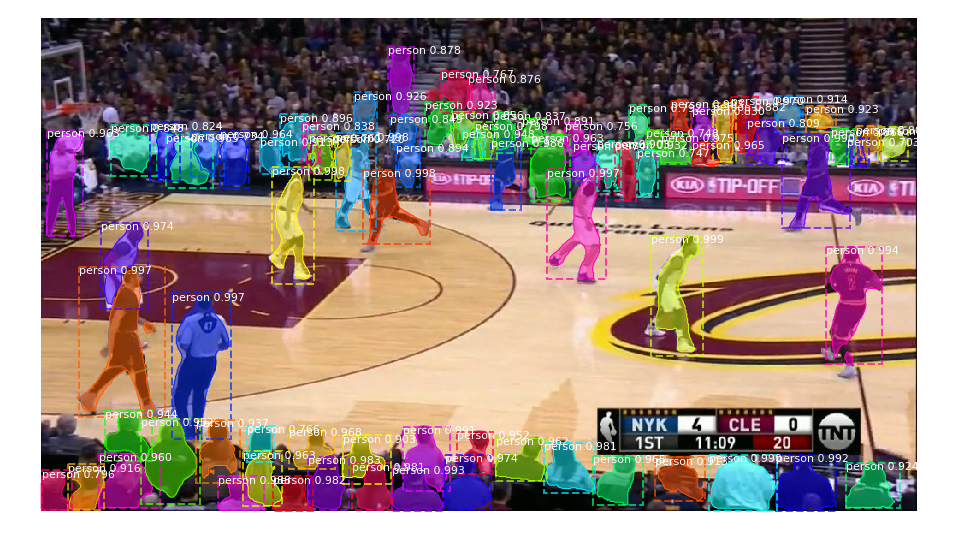

In [24]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
print(r['class_ids'])
print(class_names)
print(len(r['rois']))
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [57]:
a = r['rois']
print(a)

[[ 254  712  395  773]
 [ 174  269  310  319]
 [ 134  344  248  391]
 [ 177  376  264  454]
 [ 176  591  304  660]
 [ 290   44  466  144]
 [ 321  152  491  221]
 [ 267  917  404  983]
 [ 524  410  576  469]
 [ 510  859  576  929]
 [ 477  422  552  478]
 [ 510  780  576  860]
 [ 135  866  245  945]
 [ 535  206  575  260]
 [ 141  526  224  561]
 [ 512  311  575  359]
 [ 535  270  576  317]
 [ 520  363  575  410]
 [ 496  587  555  647]
 [ 135  724  170  759]
 [ 239   70  340  124]
 [ 510  472  574  526]
 [ 145  621  191  648]
 [  92  806  156  838]
 [ 479  289  527  343]
 [ 144  761  172  791]
 [ 511  645  569  703]
 [ 136  145  198  200]
 [ 131  209  198  243]
 [ 130    6  254   48]
 [ 506  236  570  281]
 [ 136  572  213  618]
 [ 490  531  541  591]
 [ 509   67  572  139]
 [ 483  486  533  528]
 [ 468  116  567  185]
 [ 131  491  165  519]
 [ 458   74  517  129]
 [ 469  181  543  232]
 [ 144  671  213  695]
 [  86  365  134  392]
 [ 519  941  572 1004]
 [  97  448  154  487]
 [ 102  894

In [58]:
b = a

d = np.concatenate([a, b])

In [59]:
d

array([[ 254,  712,  395,  773],
       [ 174,  269,  310,  319],
       [ 134,  344,  248,  391],
       [ 177,  376,  264,  454],
       [ 176,  591,  304,  660],
       [ 290,   44,  466,  144],
       [ 321,  152,  491,  221],
       [ 267,  917,  404,  983],
       [ 524,  410,  576,  469],
       [ 510,  859,  576,  929],
       [ 477,  422,  552,  478],
       [ 510,  780,  576,  860],
       [ 135,  866,  245,  945],
       [ 535,  206,  575,  260],
       [ 141,  526,  224,  561],
       [ 512,  311,  575,  359],
       [ 535,  270,  576,  317],
       [ 520,  363,  575,  410],
       [ 496,  587,  555,  647],
       [ 135,  724,  170,  759],
       [ 239,   70,  340,  124],
       [ 510,  472,  574,  526],
       [ 145,  621,  191,  648],
       [  92,  806,  156,  838],
       [ 479,  289,  527,  343],
       [ 144,  761,  172,  791],
       [ 511,  645,  569,  703],
       [ 136,  145,  198,  200],
       [ 131,  209,  198,  243],
       [ 130,    6,  254,   48],
       [ 5

In [ ]:
import cv2

camera = cv2.VideoCapture()